In [1]:
# Import necessary libraries
import pandas as pd
from pycaret.classification import *
from imblearn.combine import *
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split

# Load your data
Ped_df = pd.read_csv('df2.csv')

features1 = [#'Fatalities',
                        'PersonType','Sex', #'AgeGroup',
                        'AgeText',
                       'Aggressive','AlcoholSuspected',
                       'AlcResult',#'InjuryArea',
                       'UrbanRural','FunctionClass',#'CommercialMotorVehInvolved'
                       'Light','Weather','RoadwaySurf','DisregardTrafficControl','DistractedDriving','DomesticAnimalRelated',
                       'DrowsyDriving','DrugsSuspected',#'OlderDriverInvolved'
                       'TeenageDriverInvolved','DUI','HeavyTruckInvolved',
                       'OverturnRollover','RightTurn','TransitVehicleInvolved','HolidayCrash','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved'#,'WrongWayDriving'
                       ]
                       
features2 = ['Sex', 'AgeText',
                       'Aggressive',
                       'AlcResult',
                       'UrbanRural','FunctionClass',
                       'Light','Weather','RoadwaySurf','DrowsyDriving',
                       'DUI',
                       'RightTurn','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved'
                       ]    
                                          
features3 = ['Sex', 'AgeText',
                       'Aggressive',
                       'AlcResult', 'CommercialMotorVehInvolved',
                       'UrbanRural','FunctionClass',
                       'Light','Weather','RoadwaySurf','DrowsyDriving', 'DistractedDriving',
                       'DUI','TeenageDriverInvolved','HeavyTruckInvolved',
                       'RightTurn','HolidayCrashYN','Intersection',
                       'LeftUTurnInvolved','VerticalAlignment','WorkZoneInvolved', 'WrongWayDriving'
                       ]

X = Ped_df[features2]
y = Ped_df['Severity']

X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.20,random_state=2023)
smote = SMOTETomek(random_state=2023)
X_train_over,y_train_over = smote.fit_resample(X_train,y_train)

# Combine features and target into a single DataFrame
data = X_train_over
data['Severity'] = y_train_over

# Setting up the environment in PyCaret with imbalance handling
clf1 = setup(data, target='Severity', session_id=123, 
             normalize=True, transformation=True, 
             remove_multicollinearity=True, multicollinearity_threshold=0.9,
             fix_imbalance=True, fix_imbalance_method=SMOTE(), feature_selection = False)

# Compare models with a focus on AUC (Area Under the ROC Curve)
best_model = compare_models(sort='F1')
#best_model = compare_models()

# Create a model
model = create_model(best_model)
#stacker = stack_models(compare_models(n_select = 3))

# Tune the model (Hyperparameter tuning)
#tuned_model = tune_model(model, optimize='F1')

# Evaluate the model
#evaluate_model(tuned_model)
evaluate_model(model)
#evaluate_model(stacker)

# Finalize the model
#final_model = finalize_model(tuned_model)

# Predict on new data
#predictions = predict_model(final_model, data=unseen_data)

# Save the model
#save_model(final_model, 'final_model')

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000918 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 301
[LightGBM] [Info] Number of data points in the train set: 11871, number of used features: 25
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612
[LightGBM] [Info] Start training from score -1.098612


,Description,Value
0,Session id,123
1,Target,Severity
2,Target type,Multiclass
3,Original data shape,"(16744, 29)"
4,Transformed data shape,"(16895, 6)"
5,Transformed train set shape,"(11871, 6)"
6,Transformed test set shape,"(5024, 6)"
7,Numeric features,28
8,Preprocess,True
9,Imputation type,simple


,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.6840,0.8546,0.6840,0.6825,0.6812,0.5259,0.5274,0.6780
et,Extra Trees Classifier,0.6788,0.8475,0.6788,0.6776,0.6776,0.5182,0.5186,0.6150
xgboost,Extreme Gradient Boosting,0.6765,0.8491,0.6765,0.6726,0.6729,0.5145,0.5157,0.5680
dt,Decision Tree Classifier,0.6719,0.8229,0.6719,0.6708,0.6707,0.5078,0.5083,0.4060
catboost,CatBoost Classifier,0.6687,0.8480,0.6687,0.6643,0.6645,0.5028,0.5043,2.6930
lightgbm,Light Gradient Boosting Machine,0.6553,0.8380,0.6553,0.6501,0.6505,0.4827,0.4843,0.6540
knn,K Neighbors Classifier,0.6394,0.8078,0.6394,0.6384,0.6383,0.4590,0.4595,0.4560
gbc,Gradient Boosting Classifier,0.5993,0.7860,0.5993,0.5912,0.5920,0.3987,0.4009,0.9810
ada,Ada Boost Classifier,0.5573,0.7371,0.5573,0.5457,0.5457,0.3355,0.3391,0.4800
qda,Quadratic Discriminant Analysis,0.4964,0.6759,0.4964,0.4770,0.4728,0.2441,0.2513,0.3810


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.6843,0.8554,0.6843,0.6827,0.6828,0.5263,0.5268
1,0.6715,0.8439,0.6715,0.6675,0.6665,0.5070,0.5093
2,0.7014,0.8653,0.7014,0.6991,0.6989,0.5519,0.5529
3,0.6741,0.8526,0.6741,0.6746,0.6737,0.5110,0.5115
4,0.6775,0.8506,0.6775,0.6740,0.6721,0.5159,0.5185
5,0.6980,0.8674,0.6980,0.6974,0.6950,0.5467,0.5487
6,0.6928,0.8572,0.6928,0.6938,0.6905,0.5390,0.5410
7,0.6903,0.8545,0.6903,0.6894,0.6873,0.5352,0.5370
8,0.6852,0.8521,0.6852,0.6857,0.6848,0.5277,0.5282


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

In [2]:
stacker = stack_models(compare_models(n_select = 6))
evaluate_model(stacker)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8229,0.9375,0.8229,0.8226,0.8220,0.7342,0.7349,0.5060
et,Extra Trees Classifier,0.8090,0.9269,0.8090,0.8086,0.8084,0.7135,0.7139,0.5200
dt,Decision Tree Classifier,0.7945,0.8650,0.7945,0.7954,0.7936,0.6917,0.6929,0.1870
catboost,CatBoost Classifier,0.7926,0.9247,0.7926,0.7942,0.7921,0.6887,0.6898,5.2730
xgboost,Extreme Gradient Boosting,0.7923,0.9273,0.7923,0.7943,0.7919,0.6884,0.6895,0.3760
lightgbm,Light Gradient Boosting Machine,0.7787,0.9190,0.7787,0.7803,0.7782,0.6680,0.6690,0.6610
gbc,Gradient Boosting Classifier,0.6968,0.8667,0.6968,0.7004,0.6974,0.5451,0.5460,0.9200
ada,Ada Boost Classifier,0.6549,0.7937,0.6549,0.6576,0.6552,0.4822,0.4829,0.2870
lr,Logistic Regression,0.6110,0.7940,0.6110,0.6133,0.6096,0.4161,0.4178,0.1960
ridge,Ridge Classifier,0.6091,0.0000,0.6091,0.6169,0.6056,0.4130,0.4179,0.1640


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8352,0.9442,0.8352,0.8340,0.8344,0.7527,0.7529
1,0.8420,0.9506,0.8420,0.8417,0.8417,0.7630,0.7631
2,0.8224,0.9449,0.8224,0.8235,0.8224,0.7335,0.7340
3,0.8301,0.9435,0.8301,0.8290,0.8294,0.7450,0.7452
4,0.8207,0.9401,0.8207,0.8210,0.8202,0.7310,0.7315
5,0.8138,0.9422,0.8138,0.8146,0.8131,0.7207,0.7216
6,0.8284,0.9460,0.8284,0.8280,0.8282,0.7425,0.7425
7,0.8326,0.9491,0.8326,0.8322,0.8324,0.7489,0.7489
8,0.8352,0.9486,0.8352,0.8348,0.8349,0.7527,0.7529


interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

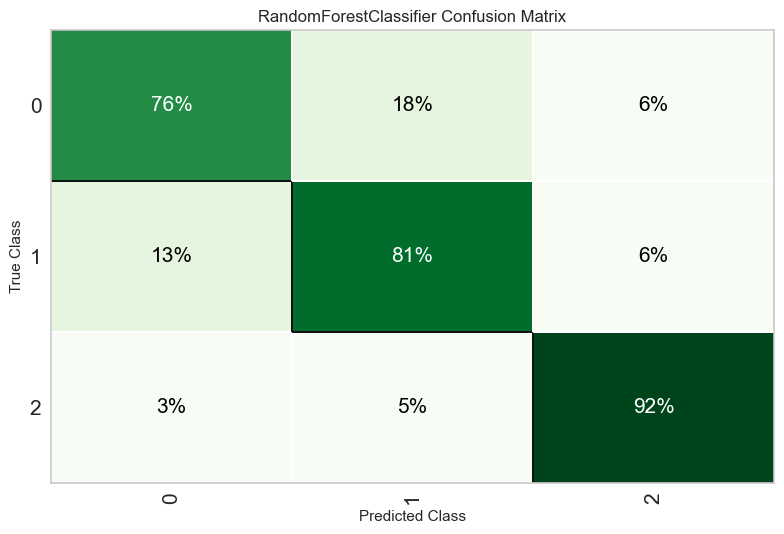

In [4]:
plot_model(best_model, plot='confusion_matrix',  plot_kwargs = {'percent' : True})

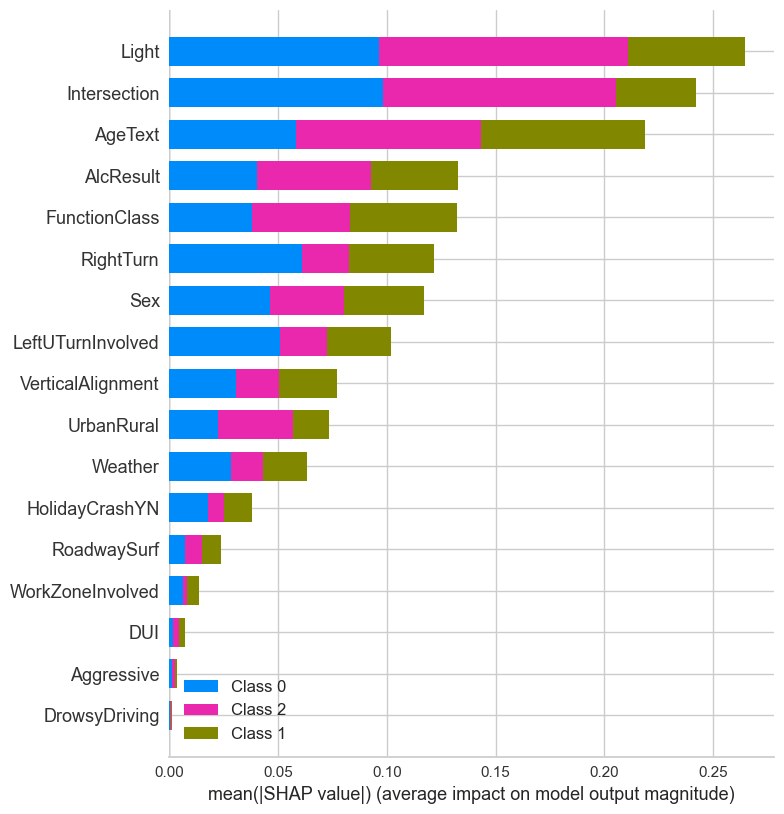

In [5]:
interpret_model(best_model)

In [ ]:
import shap
background = shap.sample(X, 150)  
explainer = shap.KernelExplainer(best_model.predict_proba, background)
shap_values = explainer.shap_values(X, n_jobs=-1) 

In [ ]:
pd.Series(y_train_over).value_counts()

In [2]:
final_model = finalize_model(model)

In [3]:
evaluate_model(final_model)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

              precision    recall  f1-score   support

           0       0.84      0.74      0.79      1431
           1       0.21      0.31      0.25       268
           2       0.21      0.30      0.25        99

    accuracy                           0.65      1798
   macro avg       0.42      0.45      0.43      1798
weighted avg       0.71      0.65      0.68      1798



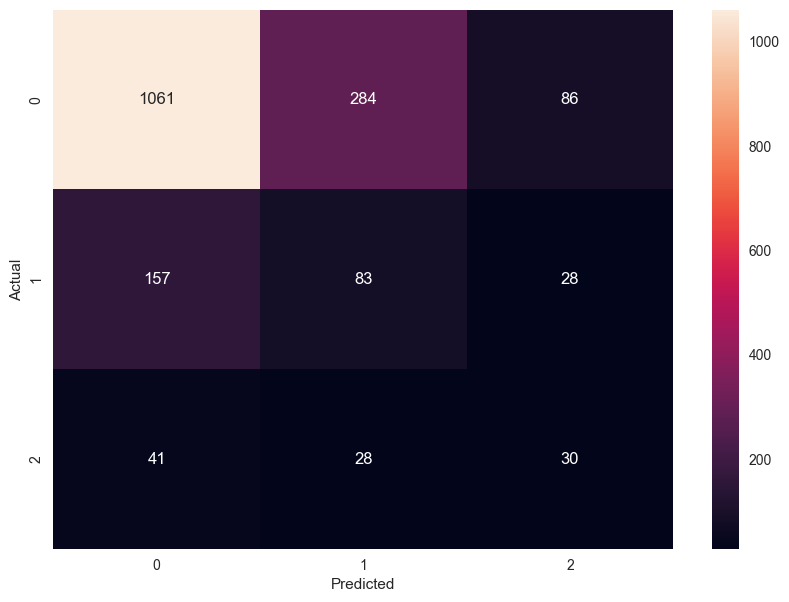

In [14]:
# Assuming 'final_model' is your tuned and finalized model from PyCaret

# Predict on the original validation set
predictions_val = predict_model(final_model, data=X_val)

# The predict_model function adds a column with the label predictions
# Compare these predictions with the actual labels (y_val)
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Use the correct column name for predicted labels
y_pred = predictions_val['prediction_label']

# Now you can proceed to calculate the metrics
accuracy_val = accuracy_score(y_val, y_pred)
f1_val = f1_score(y_val, y_pred, average='micro')  # For multiclass problems, specify the average parameter

# Print the classification report for detailed metrics
print(classification_report(y_val, y_pred))

# If you want to also look at the confusion matrix
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(10,7))
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [15]:
models(type='ensemble').index.tolist()

['rf', 'ada', 'gbc', 'et', 'xgboost', 'lightgbm', 'catboost']

In [16]:
from pycaret.classification import compare_models
ensembled_models = compare_models(models(type='ensemble').index.tolist(), fold = 10)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
rf,Random Forest Classifier,0.8228,0.9379,0.8228,0.8223,0.8218,0.7341,0.7348,0.7480
et,Extra Trees Classifier,0.8091,0.9267,0.8091,0.8087,0.8085,0.7136,0.7140,0.4690
catboost,CatBoost Classifier,0.7905,0.9248,0.7905,0.7921,0.7901,0.6857,0.6867,2.9850
xgboost,Extreme Gradient Boosting,0.7879,0.9268,0.7879,0.7899,0.7876,0.6817,0.6828,0.3350
lightgbm,Light Gradient Boosting Machine,0.7785,0.9192,0.7785,0.7799,0.7780,0.6677,0.6687,0.4200
gbc,Gradient Boosting Classifier,0.6989,0.8669,0.6989,0.7030,0.6995,0.5482,0.5492,0.8520
ada,Ada Boost Classifier,0.6567,0.7940,0.6567,0.6594,0.6571,0.4849,0.4855,0.2330


In [17]:
rf = create_model('rf')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8215,0.9352,0.8215,0.8205,0.8199,0.7322,0.7332
1,0.8326,0.9436,0.8326,0.8322,0.8313,0.7488,0.7498
2,0.8164,0.9337,0.8164,0.8168,0.8156,0.7245,0.7254
3,0.8155,0.9362,0.8155,0.8146,0.8143,0.7232,0.7238
4,0.8155,0.9330,0.8155,0.8152,0.8144,0.7232,0.7241
5,0.8061,0.9357,0.8061,0.8075,0.8051,0.7091,0.7106
6,0.8215,0.9371,0.8215,0.8206,0.8208,0.7322,0.7325
7,0.8266,0.9395,0.8266,0.8260,0.8258,0.7399,0.7404
8,0.8335,0.9385,0.8335,0.8333,0.8331,0.7502,0.7505


In [19]:
et = create_model('et')
xgboost = create_model('xgboost')
lightgbm = create_model('lightgbm')
catboost = create_model('catboost')


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.8087,0.9188,0.8087,0.8076,0.8076,0.7130,0.7135
1,0.8232,0.9331,0.8232,0.8228,0.8222,0.7348,0.7355
2,0.7985,0.9224,0.7985,0.7987,0.7981,0.6976,0.6981
3,0.8044,0.9256,0.8044,0.8034,0.8034,0.7066,0.7070
4,0.7985,0.9273,0.7985,0.7979,0.7976,0.6976,0.6981
5,0.8044,0.9258,0.8044,0.8050,0.8039,0.7066,0.7073
6,0.8070,0.9278,0.8070,0.8064,0.8066,0.7105,0.7105
7,0.8147,0.9294,0.8147,0.8139,0.8142,0.7220,0.7221
8,0.8207,0.9301,0.8207,0.8210,0.8205,0.7310,0.7312


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7891,0.9305,0.7891,0.7901,0.7884,0.6835,0.6845
1,0.7985,0.9325,0.7985,0.8014,0.7987,0.6976,0.6987
2,0.7822,0.9273,0.7822,0.7848,0.7825,0.6733,0.6741
3,0.7882,0.9272,0.7882,0.7881,0.7873,0.6822,0.6829
4,0.7737,0.9195,0.7737,0.7745,0.7724,0.6605,0.6619
5,0.7797,0.9204,0.7797,0.7824,0.7788,0.6694,0.6712
6,0.7942,0.9290,0.7942,0.7943,0.7936,0.6912,0.6917
7,0.8044,0.9317,0.8044,0.8047,0.8040,0.7066,0.7071
8,0.7959,0.9303,0.7959,0.7977,0.7954,0.6938,0.6950


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7754,0.9253,0.7754,0.7768,0.7752,0.6630,0.6638
1,0.7942,0.9234,0.7942,0.7967,0.7936,0.6912,0.6927
2,0.7746,0.9182,0.7746,0.7765,0.7750,0.6618,0.6623
3,0.7814,0.9191,0.7814,0.7816,0.7806,0.6720,0.6727
4,0.7558,0.9100,0.7558,0.7569,0.7546,0.6335,0.6349
5,0.7566,0.9116,0.7566,0.7607,0.7564,0.6348,0.6367
6,0.7874,0.9211,0.7874,0.7879,0.7868,0.6809,0.6816
7,0.7882,0.9247,0.7882,0.7891,0.7880,0.6823,0.6828
8,0.7899,0.9163,0.7899,0.7910,0.7899,0.6848,0.6853


,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7925,0.9255,0.7925,0.7929,0.7915,0.6886,0.6896
1,0.7950,0.9292,0.7950,0.7970,0.7947,0.6925,0.6936
2,0.7857,0.9255,0.7857,0.7888,0.7860,0.6784,0.6795
3,0.7780,0.9251,0.7780,0.7798,0.7775,0.6668,0.6679
4,0.7737,0.9159,0.7737,0.7763,0.7726,0.6604,0.6624
5,0.7763,0.9191,0.7763,0.7793,0.7758,0.6643,0.6659
6,0.7891,0.9247,0.7891,0.7897,0.7889,0.6835,0.6840
7,0.8010,0.9268,0.8010,0.7998,0.7999,0.7015,0.7019
8,0.7968,0.9258,0.7968,0.7994,0.7967,0.6951,0.6963


In [22]:
stacker = stack_models(estimator_list = [et,xgboost,lightgbm,catboost], meta_model=rf)

In [ ]:
evaluate_model(stacker)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

<Figure size 800x550 with 0 Axes>